In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris, load_wine

In [3]:
def train_random_forest(X, y, dataset_name, n_estimators=5):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, criterion='gini', random_state=42)
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

    # Compute Performance Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f'Performance on {dataset_name} dataset:')
    print(f'Accuracy: {acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Plot individual trees
    fig, axes = plt.subplots(1, n_estimators, figsize=(15, 5))
    for i, tree in enumerate(rf.estimators_):
        plot_tree(tree, filled=True, ax=axes[i])
        axes[i].set_title(f'Tree {i+1}')
    plt.show()

Performance on Iris dataset:
Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



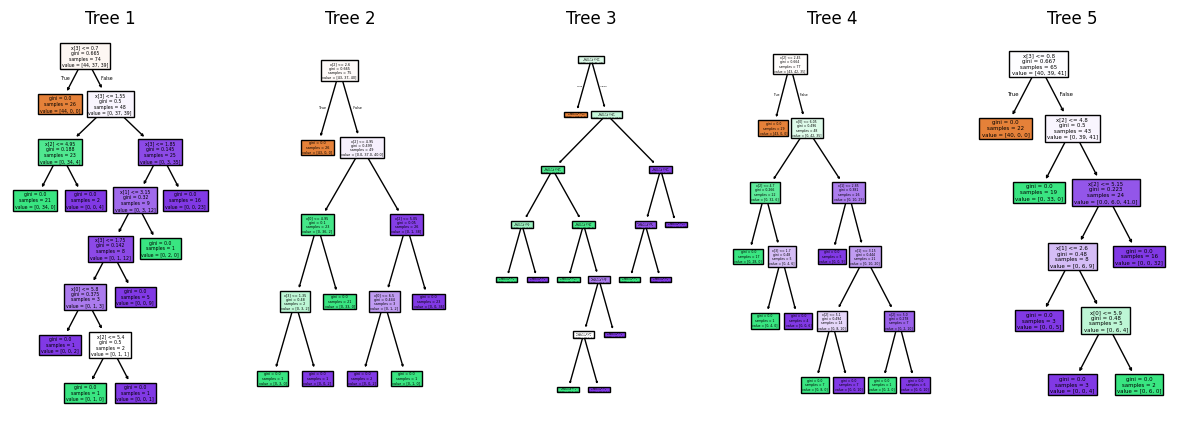

Performance on Wine dataset:
Accuracy: 0.8889
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.86      0.86      0.86        14
           2       0.88      0.88      0.88         8

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



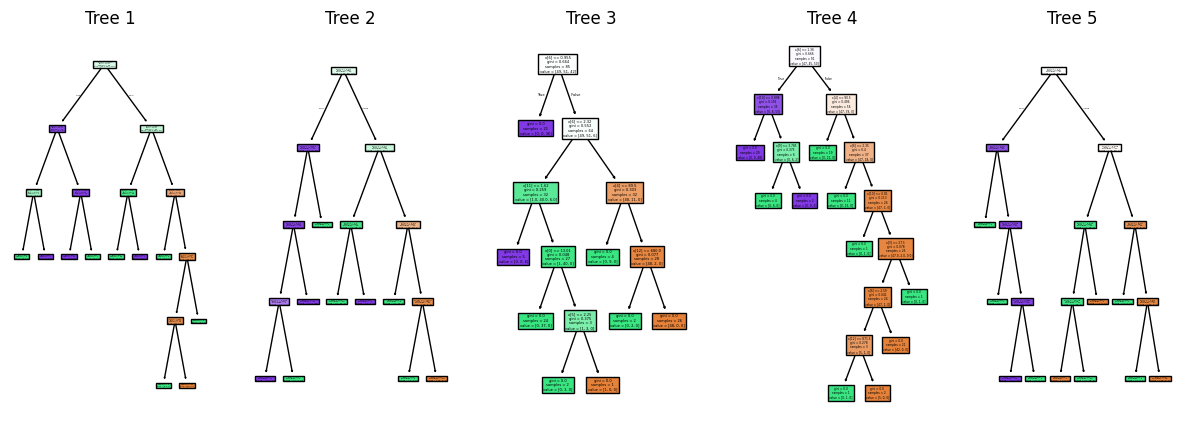

In [4]:
# Load and train on Iris dataset
iris = load_iris()
train_random_forest(iris.data, iris.target, 'Iris')

# Load and train on Wine dataset
wine = load_wine()
train_random_forest(wine.data, wine.target, 'Wine')